In [3]:
import pandas as pd

#Read the file
paygap = pd.read_csv("./sdg_05_20.tsv/sdg_05_20.tsv", sep="[,\t]", engine="python")

#Drop the unnecessary rows
cols = paygap.columns.drop(['unit','nace_r2'])
paygap = paygap[cols]

#Un-pivot the dataset
paygap = paygap.melt(id_vars = "geo\\time", var_name='year', value_name='Gender Gap Percentage')
cols = paygap.columns.drop(['geo\\time'])

#Make percentages into number 
paygap['Gender Gap Percentage'] = paygap['Gender Gap Percentage'].apply(lambda x: pd.to_numeric(x, errors = 'coerce')) 

#Take out entries with NaN
paygap = paygap[paygap['Gender Gap Percentage'].notnull()]







In [4]:
#Read the file 

education = pd.read_csv("./educ_uoe_enrt03.tsv/educ_uoe_enrt03.tsv", sep="[,\t]", engine="python")

#Drop unnecessary rows

education.drop(["iscedf13", "isced11", "unit"], inplace = True, axis = 1)
cols = education.columns.drop(['sex', 'geo\\time'])

#Make rows into numbers
education[cols] = education[cols].apply(lambda x: pd.to_numeric(x, errors = 'coerce')) 

#Take out "total" from sex row
education = education[education.sex != "T"]

#Create percentages of women/males in education
bycountryandsex = education.groupby(['geo\\time','sex']).sum()
bycountry = education.groupby(['geo\\time']).sum()
percentages = bycountryandsex.div(bycountry, level='geo\\time') * 100

#Take out male percentages, taking out the sex column
percentages.reset_index(inplace=True)
percentages = percentages[percentages.sex != "M"]
percentages = percentages.drop('sex', axis=1)

#Un-pivot the dataset 
percentages = percentages.melt(id_vars="geo\\time", var_name='year', value_name="Percentage of women in academy")

#Take out entries with NaN
percentages = percentages[percentages['Percentage of women in academy'].notnull()]




In [7]:
#Inner join of datasets

dataset = pd.merge(percentages, paygap, on = ["geo\\time", 'year'])


dataset.to_csv(path_or_buf="./project.csv")

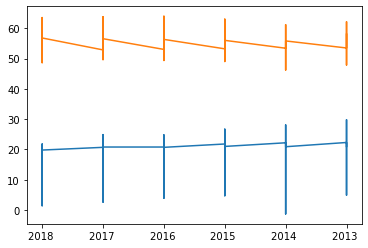

In [51]:
import matplotlib.pyplot as plt 

x = dataset.year 
y = dataset['Gender Gap Percentage']

plt.plot(x, y)


x = dataset.year 
y = dataset['Percentage of women in academy']

plt.plot(x, y)


